In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/Og_TrainingData_6000.xlsx')
df.head(10)

,Depth,Soeed,Class
0,0.020,1800,1
1,0.021,1800,1
2,0.022,1800,1
3,0.023,1800,1
4,0.024,1800,1
5,0.025,1800,1
6,0.026,1800,1
7,0.027,1800,1
8,0.028,1800,1
9,0.029,1800,1


In [4]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [5]:
df.head(10)

,Depth,Soeed,Class
0,0.040,3600,1
1,0.077,3850,0
2,0.077,2350,1
3,0.094,2050,1
4,0.069,4150,0
5,0.053,3600,1
6,0.089,2600,0
7,0.062,3650,1
8,0.051,1800,1
9,0.092,4150,0


In [6]:
# df['Soeed']=df['Soeed'].astype(np.float64)
# df['Class']=df['Class'].astype(np.float64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6279 entries, 0 to 6278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   6279 non-null   float64
 1   Soeed   6279 non-null   int64  
 2   Class   6279 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 147.3 KB


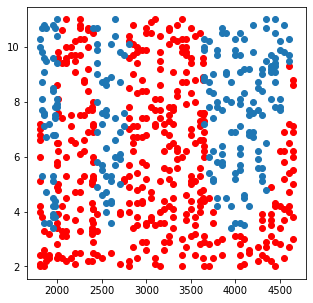

In [8]:
X1=[]
Y1=[]
X2=[]
Y2=[]
for i in range(616):
  if df.iloc[i,2]==1.0:
    X1.append(df.iloc[i,0]*100)
    Y1.append(df.iloc[i,1])
  else:
    X2.append(df.iloc[i,0]*100)
    Y2.append(df.iloc[i,1])
plt.figure(figsize=[5,5])
plt.scatter(Y1,X1,c='red')
plt.scatter(Y2,X2)
plt.show()

In [9]:

# print(onehot.shapfrom numpy import asarray
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# onehot = encoder.fit_transform(df)e)

In [10]:
y=pd.DataFrame(data=df['Class'])
X=df.drop(columns=['Class'])
# X=pd.DataFrame(data=X)
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# y = encoder.fit_transform(y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=False)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
X.head()

,Depth,Soeed
0,0.040,3600
1,0.077,3850
2,0.077,2350
3,0.094,2050
4,0.069,4150


In [12]:
X_train=pd.DataFrame(data=X_train,columns=['Depth','Soeed'])
X_test=pd.DataFrame(data=X_test,columns=['Depth','Soeed'])

In [13]:
X_train.head()

,Depth,Soeed
0,0.222222,0.631579
1,0.633333,0.719298
2,0.633333,0.192982
3,0.822222,0.087719
4,0.544444,0.824561


In [14]:
X_train.shape

(4709, 2)

In [15]:
y_train.shape

(4709, 1)

In [16]:
X_train.head()

,Depth,Soeed
0,0.222222,0.631579
1,0.633333,0.719298
2,0.633333,0.192982
3,0.822222,0.087719
4,0.544444,0.824561


In [17]:
# y_train=y_train.astype(int)

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# model = Sequential([
#         Dense(activation = "relu", input_dim = 2, units = 2),
#         Dense(activation = "relu", units = 6),
#         Dense(activation = "relu", units = 6),
#         Dense(activation = "softmax", units = 1)
# ])
# optimizer = keras.optimizers.RMSprop(lr=0.1)
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='sgd',metrics='accuracy')
def build_model(l,n):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(activation = "relu", input_dim = 2, units = 2))
    for i in range(l):
      model.add(tf.keras.layers.Dense(activation = "relu", units = n))
    model.add(tf.keras.layers.Dense(activation = "softmax", units = 2))
    return model
  

In [ ]:
start=32
end=512
step=32
accuracy=np.ndarray(shape=(19,int(end/step)),dtype='float')
# m=0
n=0
mx=0
# optimizer = keras.optimizers.Adam(lr=0.01)
for i in range(2,21):
    for j in range(start,end+1,step):
          model=build_model(i,j)
          model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
          callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
          model.fit(X_train , y_train,validation_split=0.25,epochs=500,shuffle=False,callbacks=[callback])
          y_pred = model.predict(X_test)
          y_pred = np.argmax(y_pred, axis=1)
          # acc = accuracy_score(y_pred,y_test)
          # print(acc)
          # print(y_pred)
          # y_pred = np.argmax(y_pred, axis=1)
          # print(y_pred)
          # m = tf.keras.metrics.CategoricalAccuracy()
          # m.update_state(y_test, y_pred) 
          # print(y_test)
          # print(y_pred)
          # if(mx<accuracy_score(y_pred,y_test)):
          #   mx=accuracy_score(y_pred,y_test)
          #   m=i
          #   n=j
          n=(j-start)//step
          accuracy[i-2,n]=accuracy_score(y_pred,y_test)
          # print(accuracy_score(y_pred,y_test))



Streaming output truncated to the last 5000 lines.
111/111 [==============================] - 6s 56ms/step - loss: 0.2905 - accuracy: 0.8278 - val_loss: 0.2615 - val_accuracy: 0.8531
Epoch 22/500
111/111 [==============================] - 6s 58ms/step - loss: 0.2910 - accuracy: 0.8306 - val_loss: 0.2447 - val_accuracy: 0.8676
Epoch 23/500
111/111 [==============================] - 6s 57ms/step - loss: 0.3070 - accuracy: 0.8289 - val_loss: 0.2647 - val_accuracy: 0.8574
Epoch 24/500
111/111 [==============================] - 6s 57ms/step - loss: 0.2908 - accuracy: 0.8459 - val_loss: 0.3027 - val_accuracy: 0.8285
Epoch 25/500
111/111 [==============================] - 6s 56ms/step - loss: 0.2783 - accuracy: 0.8457 - val_loss: 0.2556 - val_accuracy: 0.8557
Epoch 26/500
111/111 [==============================] - 6s 58ms/step - loss: 0.2750 - accuracy: 0.8471 - val_loss: 0.2970 - val_accuracy: 0.8260
Epoch 27/500
111/111 [==============================] - 7s 59ms/step - loss: 0.2838 - accura

In [ ]:
# model.fit(X_train , y_train,validation_split=0.25,epochs=1,shuffle=False)

In [ ]:
# print(y_pred)

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# y_pred = model.predict(X_test)
# # print(y_pred)
# y_pred = (y_pred > 0.5)
# # print(y_pred)
# print(accuracy_score(y_pred,y_test))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [ ]:
result = np.where(accuracy == np.amax(accuracy))
listOfCordinates = list(zip(result[0], result[1]))
# travese over the list of cordinates
for cord in listOfCordinates:
    print(cord)
    print(accuracy[cord[0],cord[1]])

In [ ]:
# print(m,n)
# print(mx)
print(accuracy)

In [ ]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
# nx, ny = 256, 1024
x = range(2,21)
y = range(1,17)

data = accuracy

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(range(2,21), range(1,17), accuracy, 50, cmap='binary')